Abdul Raheman (MSCS-634-B01) ProjectDeliverable_1

I have selected the Breast Cancer Wisconsin (Diagnostic) dataset

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np

# Load the dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')
df = pd.concat([X, y], axis=1)

# Inspect structure
print("Dataset shape:", df.shape)
print("\nClass distribution:\n", y.value_counts(normalize=True))
print("\nFeature names:", data.feature_names.tolist())
print("\nData description:", data.DESCR)
print("\nSummary statistics:\n", X.describe())

Dataset shape: (569, 31)

Class distribution:
 target
1    0.627417
0    0.372583
Name: proportion, dtype: float64

Feature names: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']

Data description: .. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
 

In [ ]:
# Check for missing values
missing = df.isnull().sum().sum()
print("Total missing values:", missing)

# Check for duplicates
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

# Identify outliers using IQR for all features (for reporting)
outlier_counts = {}
for col in X.columns:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((X[col] < (Q1 - 1.5 * IQR)) | (X[col] > (Q3 + 1.5 * IQR))).sum()
    outlier_counts[col] = outliers
print("\nOutlier counts per feature:\n", outlier_counts)

# Handling: No missing or duplicates. For outliers/noise, since this is medical imaging data, outliers may represent real extreme cases (e.g., large tumors). No removal performed to preserve data integrity; instead, note for potential robust scaling in later steps.
# If needed, could cap outliers, but proceeding without for now.

Total missing values: 0
Number of duplicate rows: 0

Outlier counts per feature:
 {'mean radius': np.int64(14), 'mean texture': np.int64(7), 'mean perimeter': np.int64(13), 'mean area': np.int64(25), 'mean smoothness': np.int64(6), 'mean compactness': np.int64(16), 'mean concavity': np.int64(18), 'mean concave points': np.int64(10), 'mean symmetry': np.int64(15), 'mean fractal dimension': np.int64(15), 'radius error': np.int64(38), 'texture error': np.int64(20), 'perimeter error': np.int64(38), 'area error': np.int64(65), 'smoothness error': np.int64(30), 'compactness error': np.int64(28), 'concavity error': np.int64(22), 'concave points error': np.int64(19), 'symmetry error': np.int64(27), 'fractal dimension error': np.int64(28), 'worst radius': np.int64(17), 'worst texture': np.int64(5), 'worst perimeter': np.int64(15), 'worst area': np.int64(35), 'worst smoothness': np.int64(7), 'worst compactness': np.int64(16), 'worst concavity': np.int64(12), 'worst concave points': np.int64(0), 

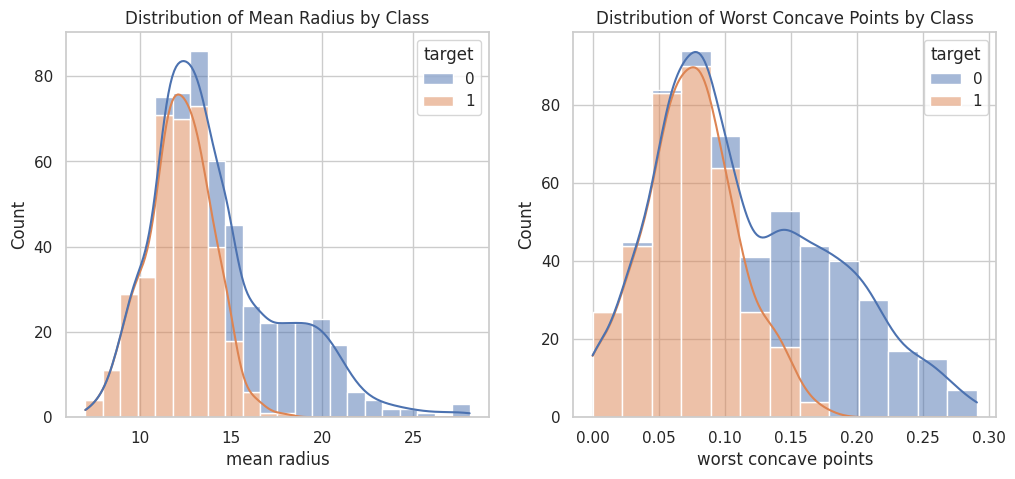

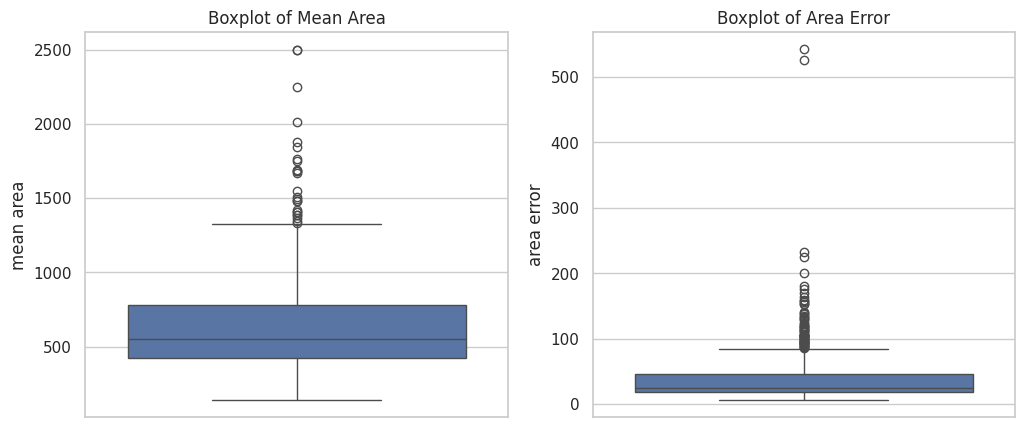

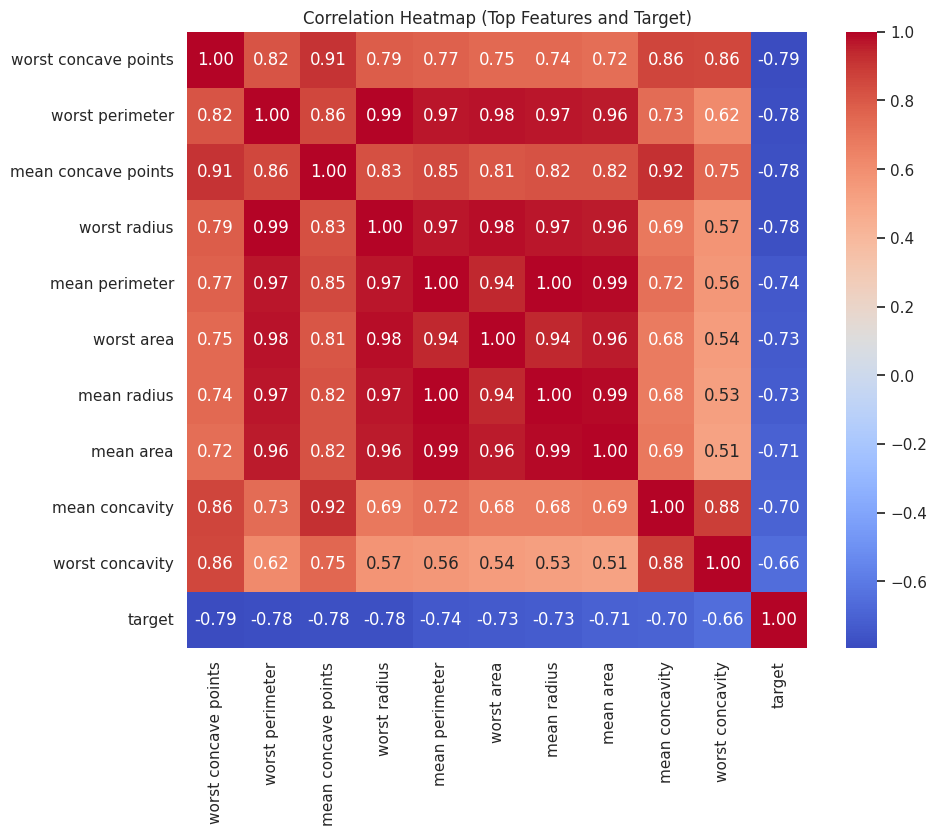

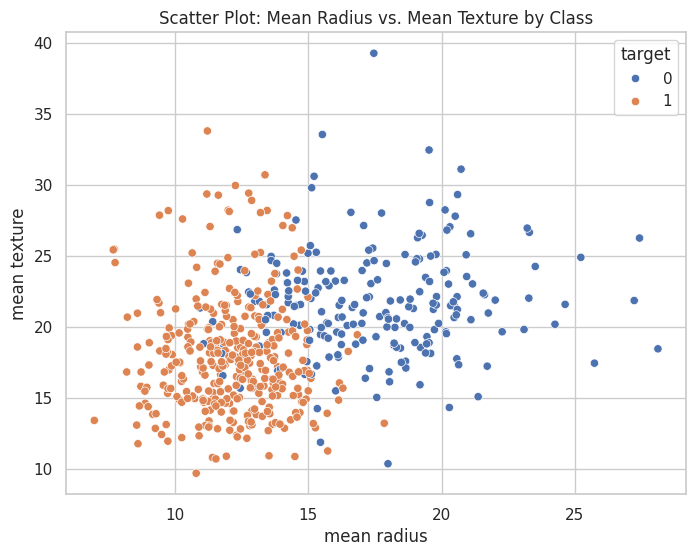

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# 1. Distributions of a few key features (e.g., mean radius, worst concave points)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=X, x='mean radius', kde=True, hue=y, multiple="stack")
plt.title('Distribution of Mean Radius by Class')

plt.subplot(1, 2, 2)
sns.histplot(data=X, x='worst concave points', kde=True, hue=y, multiple="stack")
plt.title('Distribution of Worst Concave Points by Class')
plt.show()

# 2. Boxplots for outliers in sample features
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X, y='mean area')
plt.title('Boxplot of Mean Area')

plt.subplot(1, 2, 2)
sns.boxplot(data=X, y='area error')
plt.title('Boxplot of Area Error')
plt.show()

# 3. Correlation heatmap (subset for clarity, top 10 correlated with target)
top_features = ['worst concave points', 'worst perimeter', 'mean concave points', 'worst radius', 'mean perimeter',
                'worst area', 'mean radius', 'mean area', 'mean concavity', 'worst concavity']
corr_matrix = df[top_features + ['target']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Top Features and Target)')
plt.show()

# 4. Scatter plot for feature relationships
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='mean radius', y='mean texture', hue='target')
plt.title('Scatter Plot: Mean Radius vs. Mean Texture by Class')
plt.show()

"Mean radius" and "worst concave points" are two features that make it clear which classes are which.  Cancerous tumors (0) tend to have higher values, and the distributions for these cases are skewed to the right.  This suggests that these traits are good predictors.

  Outliers in size-related features are shown by boxplots. For example, "mean area" has 25 outliers and "area error" has 65.  These may show aggressive tumors, but they might also add noise; to model this, we may need strong methods (like tree-based models) or to use winsorization.

  High feature values are linked to malignancy, as shown by strong negative correlations with the target (for example, worst concave points: -0.79, worst perimeter: -0.78).  When there is a lot of multicollinearity between size features (for example, the mean radius and mean perimeter are both about 0.99), it's best to use feature selection or PCA to get rid of unnecessary dimensions.